In [1]:
# Loading of all necessary imports
# Using Seaborn instead of matplotlib for most plots as it has more powerful plots out of the box
import pandas as pd
from os import listdir
from os.path import join
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import seaborn as sns
import numpy as np
from matplotlib import colors
from datetime import datetime 

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels
from statsmodels.regression.mixed_linear_model import MixedLMParams

In [2]:
# Local source of data
data_path = "../data/"
sns.set_theme()

In [3]:
participant_path = join(data_path, "processed", "participant_data.csv.gz")
df_participants = pd.read_csv(participant_path, compression='gzip')
df_participants.set_index("participant_id", inplace=True)


daily_path = join(data_path, 'processed', 'daily_data.csv.gz')
df_daily = pd.read_csv(daily_path, compression='gzip')



df_subset = df_daily[['sleepd', 'participant_id', 'NumberSteps', 'Fat Burn_minutes', 'Peak_minutes', 'Cardio_minutes', 'Out of Range_minutes', 'work_status']].reset_index().copy()
df_subset['Active_Minutes'] = df_subset['Cardio_minutes'] + df_subset['Peak_minutes'] + df_subset['Fat Burn_minutes'] 
df_subset['WearTime'] = df_subset['Active_Minutes'] + df_subset['Out of Range_minutes']
df_subset = df_subset[df_subset['WearTime'] >= 720]
df_test = df_subset.merge(df_participants, how='inner', on='participant_id', suffixes=(None, '_survey'))
df_test['work_status'] = df_test['work_status'] == 'yes'
df = df_test[['sleepd', 'participant_id', 'NumberSteps', 'Active_Minutes', 'shift', 'gender', 'age', 'hours', 'work_status']].dropna()
df['age'] = df['age'] /5 -5
df['age'] = df['age'].apply(lambda x: 0 if x < 0 else x)

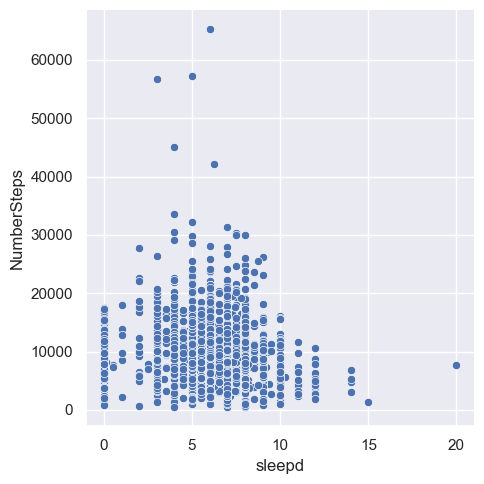

In [4]:
sns.relplot(x=df['sleepd'], y=df['NumberSteps'])

In [5]:
df

,sleepd,participant_id,NumberSteps,Active_Minutes,shift,gender,age,hours,work_status
0,8.0,02581754-36cd-4b23-85ea-bf995c6dec83,18945,230.0,2.0,1,0.0,B,False
1,5.0,02581754-36cd-4b23-85ea-bf995c6dec83,19362,220.0,2.0,1,0.0,B,False
3,8.0,02581754-36cd-4b23-85ea-bf995c6dec83,22475,384.0,2.0,1,0.0,B,False
7,3.0,02581754-36cd-4b23-85ea-bf995c6dec83,26315,343.0,2.0,1,0.0,B,False
12,8.0,02581754-36cd-4b23-85ea-bf995c6dec83,20685,368.0,2.0,1,0.0,B,False
...,...,...,...,...,...,...,...,...,...
10949,10.0,fdbd8c07-720c-4ae5-a3d8-aad56b54688c,6442,1041.0,1.0,2,5.0,B,False
10951,5.0,fdbd8c07-720c-4ae5-a3d8-aad56b54688c,8069,1007.0,1.0,2,5.0,B,False
10952,7.0,fdbd8c07-720c-4ae5-a3d8-aad56b54688c,2783,852.0,1.0,2,5.0,B,False
10953,12.0,fdbd8c07-720c-4ae5-a3d8-aad56b54688c,4983,524.0,1.0,2,5.0,B,False


In [13]:
model = smf.mixedlm('NumberSteps ~ sleepd + age + C(gender) + C(shift) + C(hours)', groups=df['participant_id'], data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Mixed Linear Model Regression Results
======================================================================
Model:                 MixedLM    Dependent Variable:    NumberSteps  
No. Observations:      4240       Method:                REML         
No. Groups:            195        Scale:                 14078986.2413
Min. group size:       1          Log-Likelihood:        -41088.9506  
Max. group size:       35         Converged:             Yes          
Mean group size:       21.7                                           
----------------------------------------------------------------------
                   Coef.    Std.Err.    z    P>|z|   [0.025    0.975] 
----------------------------------------------------------------------
Intercept         13852.323  536.682  25.811 0.000 12800.445 14904.201
C(gender)[T.2]    -1664.938  428.250  -3.888 0.000 -2504.292  -825.583
C(shift)[T.2.0]    -995.718  402.928  -2.471 0.013 -1785.444  -205.993
C(hours)[T.B]       447.725  405.646   1.104 0.270  -347.328  1242.777
sleepd             -345.190   33.756 -10.226 0.000  -411.350  -279.030
age                -366.389  113.356  -3.232 0.001  -588.563  -144.215
Group Var       6104651.570  203.109                                  
======================================================================

"""

In [14]:
for table in result.summary().tables:
    print(table.to_latex())

\begin{tabular}{lllll}
\toprule
{} &                  0 &        1 &                    2 &              3 \\
\midrule
0 &             Model: &  MixedLM &  Dependent Variable: &    NumberSteps \\
1 &  No. Observations: &     4240 &              Method: &           REML \\
2 &        No. Groups: &      195 &               Scale: &  14078986.2413 \\
3 &   Min. group size: &        1 &      Log-Likelihood: &    -41088.9506 \\
4 &   Max. group size: &       35 &           Converged: &            Yes \\
5 &   Mean group size: &     21.7 &                      &                \\
\bottomrule
\end{tabular}

\begin{tabular}{lllllll}
\toprule
{} &        Coef. & Std.Err. &        z &  P>|z| &     [0.025 &     0.975] \\
\midrule
Intercept       &    13852.323 &  536.682 &   25.811 &  0.000 &  12800.445 &  14904.201 \\
C(gender)[T.2]  &    -1664.938 &  428.250 &   -3.888 &  0.000 &  -2504.292 &   -825.583 \\
C(shift)[T.2.0] &     -995.718 &  402.928 &   -2.471 &  0.013 &  -1785.444 &   -205.993 \

C:\Users\bgrem\AppData\Local\Temp\ipykernel_19312\3406381553.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table.to_latex())


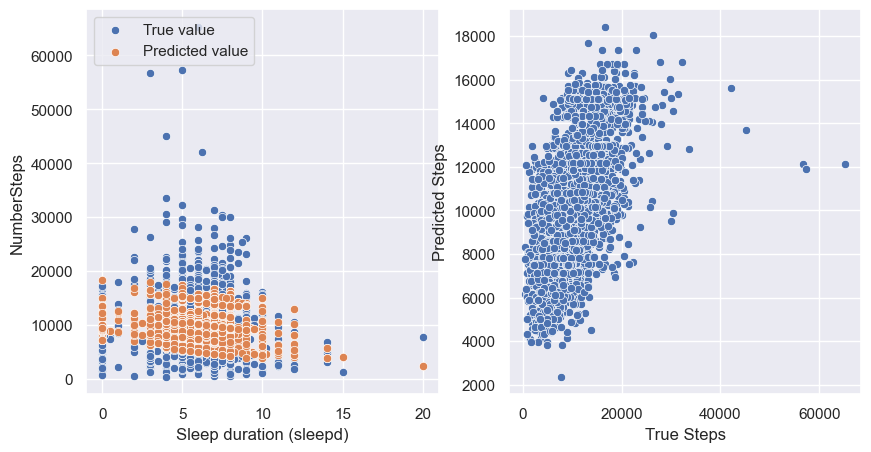

In [15]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
img = sns.scatterplot(ax=axes[0], x=df['sleepd'], y=df['NumberSteps'])
img = sns.scatterplot(ax=axes[0], x=df['sleepd'], y=result.fittedvalues)
img.set(xlabel='Sleep duration (sleepd)', ylabel='NumberSteps')
img.legend(loc='upper left', labels=['True value', 'Predicted value'])

img2 = sns.scatterplot(ax=axes[1], y=result.fittedvalues, x=df['NumberSteps'])
img2.set(xlabel='True Steps', ylabel='Predicted Steps')
fig.savefig('../sleepActiveStepsPlot.jpg')